In [1]:
import sys
sys.path.append(r'F:\\神经网络的鲁棒性探究\\Model_package')

In [2]:
sys.path.append(r'F:\\神经网络的鲁棒性探究\\Model_package\\FGSM')
print(sys.path)

['F:\\神经网络的鲁棒性探究', 'C:\\Users\\KING\\anaconda3\\python38.zip', 'C:\\Users\\KING\\anaconda3\\DLLs', 'C:\\Users\\KING\\anaconda3\\lib', 'C:\\Users\\KING\\anaconda3', '', 'C:\\Users\\KING\\anaconda3\\lib\\site-packages', 'C:\\Users\\KING\\anaconda3\\lib\\site-packages\\locket-0.2.1-py3.8.egg', 'C:\\Users\\KING\\anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\KING\\anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\KING\\anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\KING\\anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\KING\\.ipython', 'F:\\\\神经网络的鲁棒性探究\\\\Model_package', 'F:\\\\神经网络的鲁棒性探究\\\\Model_package\\\\FGSM']


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets
from torchvision.transforms import transforms
from Model_package.FGSM import fgsm
from Model_package.FGSM.fgsm import get_fgsm_samples_data
from Model_package.MLP.MLP import MLP
from Model_package.SimCLR.ContrastiveLoss import ContrastiveLoss
from GetData import GetDataLoader,GetMnistData
from Model_package.Classifier import Classifier
from Model_package import Utilites
from Utilites import TestAccuracy
import os
import numpy as np
from Model_package.FGSM.AdversarialData import SaveAdversarialData
from matplotlib import pyplot as plt

['F:\\神经网络的鲁棒性探究', 'C:\\Users\\KING\\anaconda3\\python38.zip', 'C:\\Users\\KING\\anaconda3\\DLLs', 'C:\\Users\\KING\\anaconda3\\lib', 'C:\\Users\\KING\\anaconda3', '', 'C:\\Users\\KING\\anaconda3\\lib\\site-packages', 'C:\\Users\\KING\\anaconda3\\lib\\site-packages\\locket-0.2.1-py3.8.egg', 'C:\\Users\\KING\\anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\KING\\anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\KING\\anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\KING\\anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\KING\\.ipython', 'F:\\\\神经网络的鲁棒性探究\\\\Model_package', 'F:\\\\神经网络的鲁棒性探究\\\\Model_package\\\\FGSM']
['F:\\神经网络的鲁棒性探究', 'C:\\Users\\KING\\anaconda3\\python38.zip', 'C:\\Users\\KING\\anaconda3\\DLLs', 'C:\\Users\\KING\\anaconda3\\lib', 'C:\\Users\\KING\\anaconda3', '', 'C:\\Users\\KING\\anaconda3\\lib\\site-packages', 'C:\\Users\\KING\\anaconda3\\lib\\site-packages\\locket-0.2.1-py3.8.egg', 'C:\\Users\\KING\\anaconda3\\lib\\site-packages\\win32

In [4]:
layer_num = 4

In [5]:
#def GetAvailablePath(filepath):
#    basename,extname=os.path.splitext(filepath)
#    count=0
#    newPath=basename+str(count)+extname
#    while os.path.exists(newPath):
#        count+=1
#        newPath=basename+str(count)+extname
#    return newPath

#def RecursiveCreatePath(filepath):
#    dirname,basename=os.path.split(filepath)
#    if not os.path.exists(dirname):
#        RecursiveCreatePath(dirname)
#    if not os.path.exists(filepath):
#        os.mkdir(filepath)

In [6]:
filenames={}
#filenames['rootDir']=GetAvailablePath("./Adversarial/AdversarialSamples")
filenames['MLPModelPath'] = "./Models/mlp_layer"+str(layer_num)+".pt"
#filenames['TrainAdversarialPath']=GetAvailablePath(os.path.join(filenames['rootDir'],"adversarialDataTrian-35-model.npy"))
#filenames['TestAdversarialPath']=GetAvailablePath(os.path.join(filenames['rootDir'],"adversarialDataTest-35-model.npy"))
#RecursiveCreatePath(filenames['rootDir'])

In [7]:
mlp = torch.load(filenames['MLPModelPath'])

In [8]:
mlp

MLP(
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=100, bias=True)
    (5): ReLU()
    (6): Linear(in_features=100, out_features=100, bias=True)
    (7): ReLU()
  )
  (classification): Classifier(
    (layers): ModuleList(
      (0): Linear(in_features=100, out_features=10, bias=True)
    )
  )
)

In [9]:
trainData,testData=GetMnistData()
testdataLoader=torch.utils.data.DataLoader(testData,batch_size=len(testData),shuffle=False)#数据是0~1范围内

In [10]:
#for data, target in testdataLoader:
#    print(data[0])

In [11]:
if hasattr(torch.cuda, 'empty_cache'):
    torch.cuda.empty_cache()

Epsilon: 0.0	Test Accuracy = 9824 / 10000 = 98.240000%


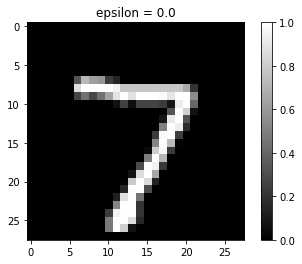

0.9824
Epsilon: 0.01	Test Accuracy = 9624 / 10000 = 96.240000%


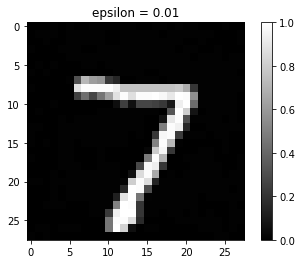

0.9624
Epsilon: 0.02	Test Accuracy = 9370 / 10000 = 93.700000%


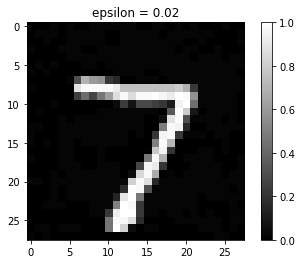

0.937
Epsilon: 0.03	Test Accuracy = 9064 / 10000 = 90.640000%


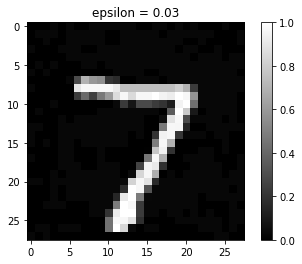

0.9064
Epsilon: 0.04	Test Accuracy = 8613 / 10000 = 86.130000%


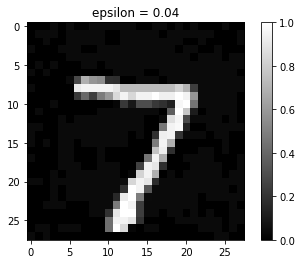

0.8613
Epsilon: 0.05	Test Accuracy = 7971 / 10000 = 79.710000%


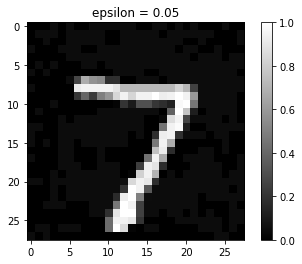

0.7971
Epsilon: 0.06	Test Accuracy = 7133 / 10000 = 71.330000%


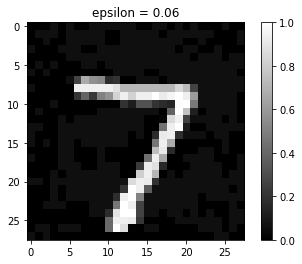

0.7133
Epsilon: 0.07	Test Accuracy = 6303 / 10000 = 63.030000%


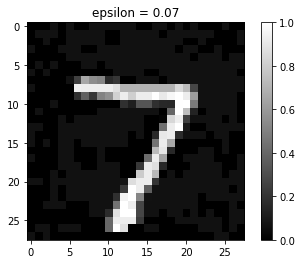

0.6303
Epsilon: 0.08	Test Accuracy = 5543 / 10000 = 55.430000%


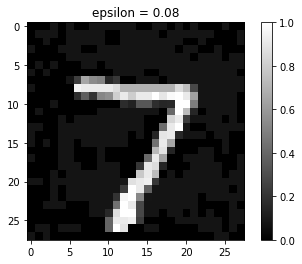

0.5543
Epsilon: 0.09	Test Accuracy = 4979 / 10000 = 49.790000%


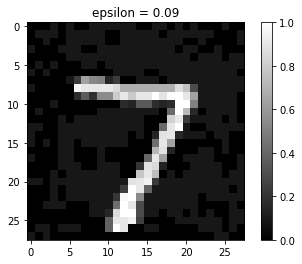

0.4979
Epsilon: 0.1	Test Accuracy = 4553 / 10000 = 45.530000%


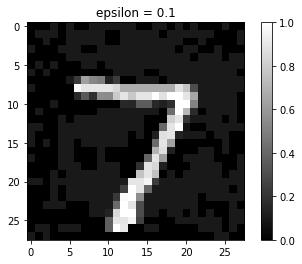

0.4553
Epsilon: 0.11	Test Accuracy = 4263 / 10000 = 42.630000%


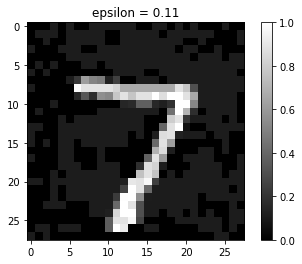

0.4263
Epsilon: 0.12	Test Accuracy = 4064 / 10000 = 40.640000%


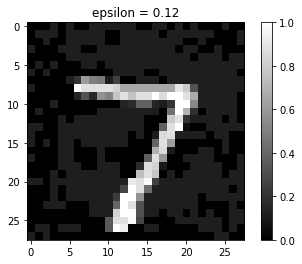

0.4064
Epsilon: 0.13	Test Accuracy = 3942 / 10000 = 39.420000%


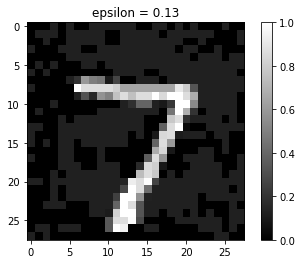

0.3942
Epsilon: 0.14	Test Accuracy = 3868 / 10000 = 38.680000%


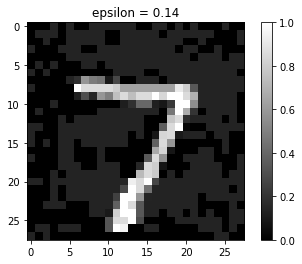

0.3868
Epsilon: 0.15	Test Accuracy = 3805 / 10000 = 38.050000%


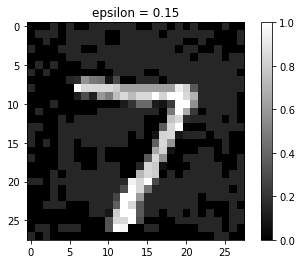

0.3805
Epsilon: 0.16	Test Accuracy = 3768 / 10000 = 37.680000%


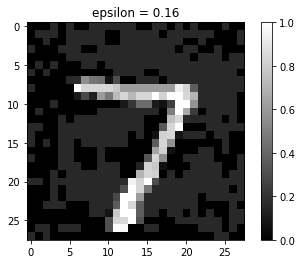

0.3768
Epsilon: 0.17	Test Accuracy = 3736 / 10000 = 37.360000%


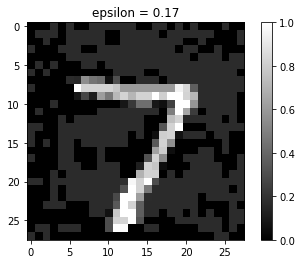

0.3736
Epsilon: 0.18	Test Accuracy = 3714 / 10000 = 37.140000%


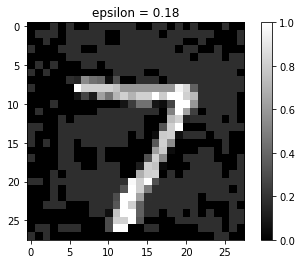

0.3714
Epsilon: 0.19	Test Accuracy = 3698 / 10000 = 36.980000%


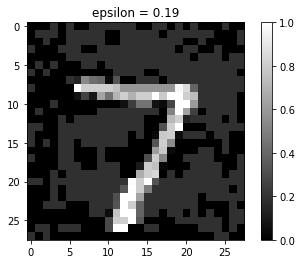

0.3698
Epsilon: 0.2	Test Accuracy = 3687 / 10000 = 36.870000%


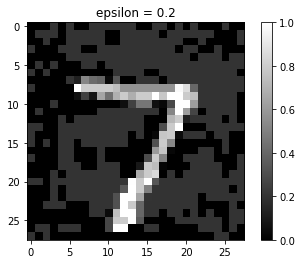

0.3687
Epsilon: 0.21	Test Accuracy = 3678 / 10000 = 36.780000%


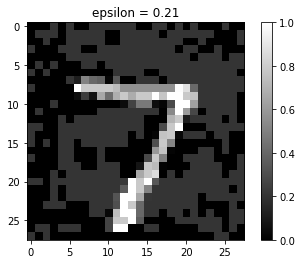

0.3678
Epsilon: 0.22	Test Accuracy = 3666 / 10000 = 36.660000%


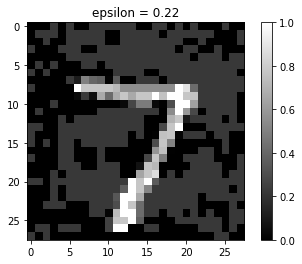

0.3666
Epsilon: 0.23	Test Accuracy = 3664 / 10000 = 36.640000%


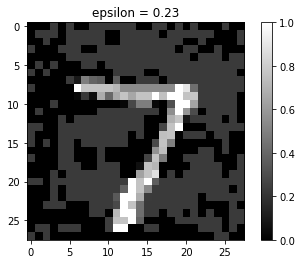

0.3664
Epsilon: 0.24	Test Accuracy = 3662 / 10000 = 36.620000%


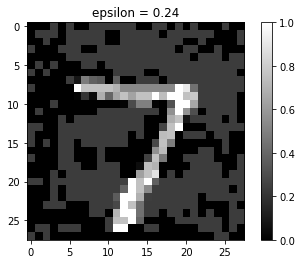

0.3662
Epsilon: 0.25	Test Accuracy = 3655 / 10000 = 36.550000%


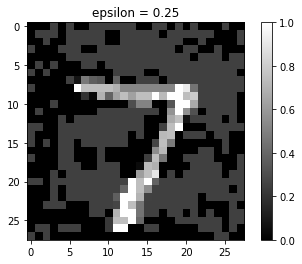

0.3655
Epsilon: 0.26	Test Accuracy = 3651 / 10000 = 36.510000%


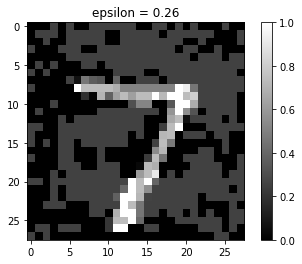

0.3651
Epsilon: 0.27	Test Accuracy = 3644 / 10000 = 36.440000%


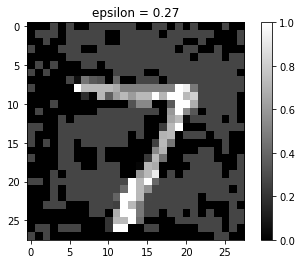

0.3644
Epsilon: 0.28	Test Accuracy = 3643 / 10000 = 36.430000%


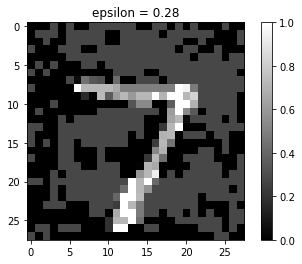

0.3643
Epsilon: 0.29	Test Accuracy = 3640 / 10000 = 36.400000%


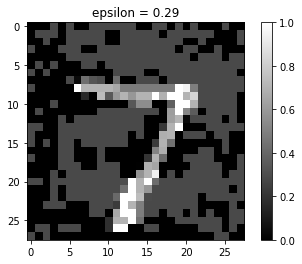

0.364
Epsilon: 0.3	Test Accuracy = 3635 / 10000 = 36.350000%


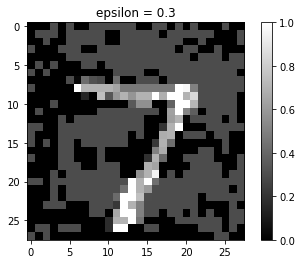

0.3635
Epsilon: 0.31	Test Accuracy = 3632 / 10000 = 36.320000%


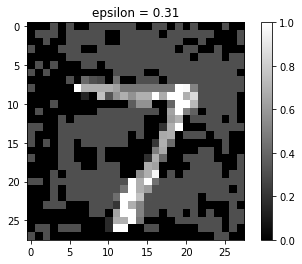

0.3632
Epsilon: 0.32	Test Accuracy = 3631 / 10000 = 36.310000%


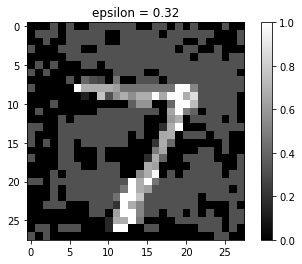

0.3631
Epsilon: 0.33	Test Accuracy = 3629 / 10000 = 36.290000%


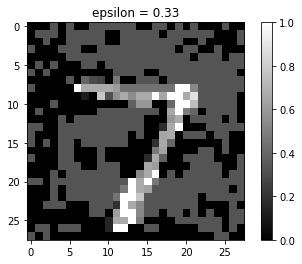

0.3629
Epsilon: 0.34	Test Accuracy = 3627 / 10000 = 36.270000%


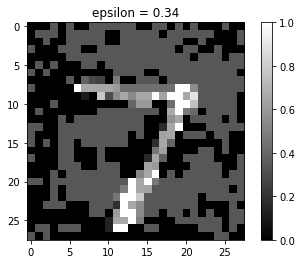

0.3627
Epsilon: 0.35000000000000003	Test Accuracy = 3624 / 10000 = 36.240000%


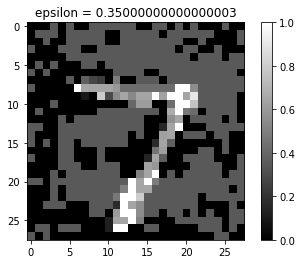

0.3624
Epsilon: 0.36	Test Accuracy = 3622 / 10000 = 36.220000%


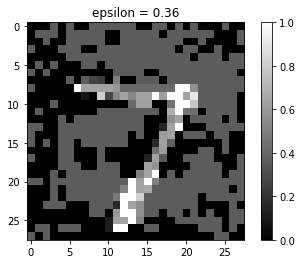

0.3622
Epsilon: 0.37	Test Accuracy = 3622 / 10000 = 36.220000%


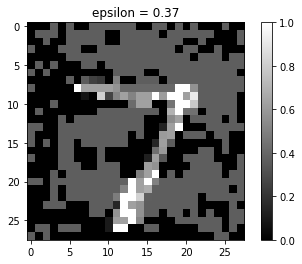

0.3622
Epsilon: 0.38	Test Accuracy = 3620 / 10000 = 36.200000%


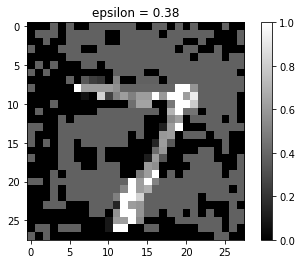

0.362
Epsilon: 0.39	Test Accuracy = 3619 / 10000 = 36.190000%


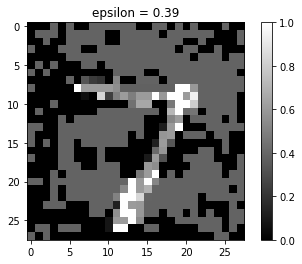

0.3619
Epsilon: 0.4	Test Accuracy = 3619 / 10000 = 36.190000%


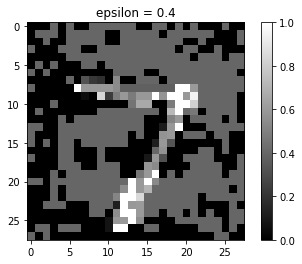

0.3619
Epsilon: 0.41000000000000003	Test Accuracy = 3618 / 10000 = 36.180000%


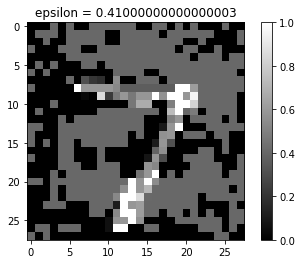

0.3618
Epsilon: 0.42	Test Accuracy = 3617 / 10000 = 36.170000%


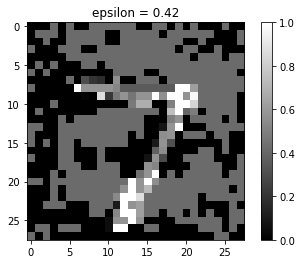

0.3617
Epsilon: 0.43	Test Accuracy = 3616 / 10000 = 36.160000%


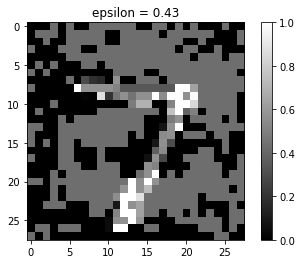

0.3616
Epsilon: 0.44	Test Accuracy = 3615 / 10000 = 36.150000%


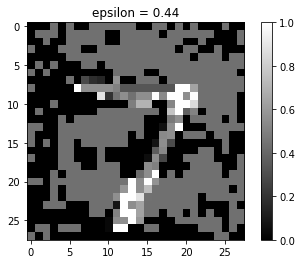

0.3615
Epsilon: 0.45	Test Accuracy = 3615 / 10000 = 36.150000%


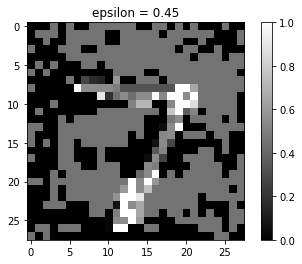

0.3615
Epsilon: 0.46	Test Accuracy = 3616 / 10000 = 36.160000%


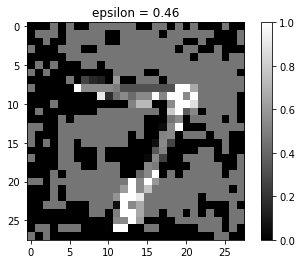

0.3616
Epsilon: 0.47000000000000003	Test Accuracy = 3616 / 10000 = 36.160000%


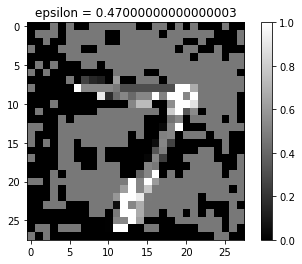

0.3616
Epsilon: 0.48	Test Accuracy = 3615 / 10000 = 36.150000%


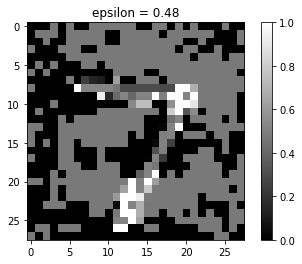

0.3615
Epsilon: 0.49	Test Accuracy = 3614 / 10000 = 36.140000%


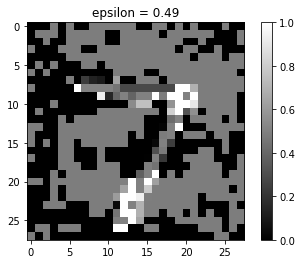

0.3614
Epsilon: 0.5	Test Accuracy = 3614 / 10000 = 36.140000%


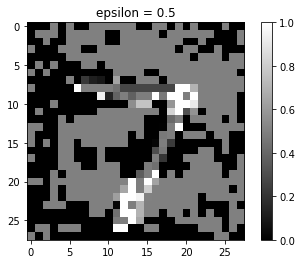

0.3614
Epsilon: 0.51	Test Accuracy = 3614 / 10000 = 36.140000%


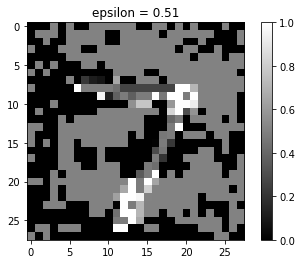

0.3614
Epsilon: 0.52	Test Accuracy = 3612 / 10000 = 36.120000%


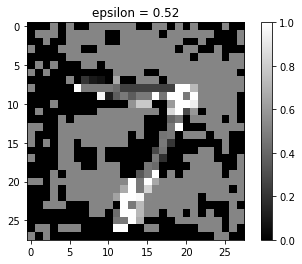

0.3612
Epsilon: 0.53	Test Accuracy = 3612 / 10000 = 36.120000%


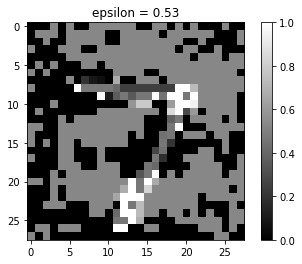

0.3612
Epsilon: 0.54	Test Accuracy = 3610 / 10000 = 36.100000%


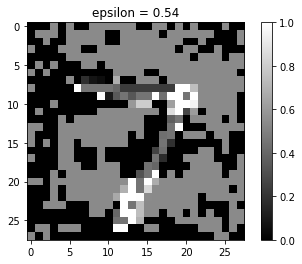

0.361
Epsilon: 0.55	Test Accuracy = 3610 / 10000 = 36.100000%


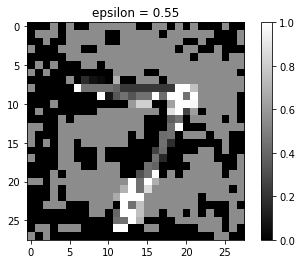

0.361
Epsilon: 0.56	Test Accuracy = 3610 / 10000 = 36.100000%


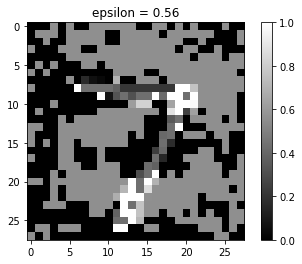

0.361
Epsilon: 0.5700000000000001	Test Accuracy = 3610 / 10000 = 36.100000%


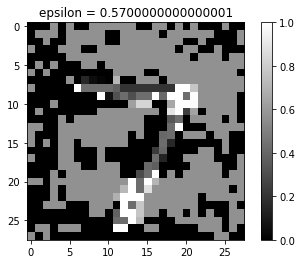

0.361
Epsilon: 0.58	Test Accuracy = 3610 / 10000 = 36.100000%


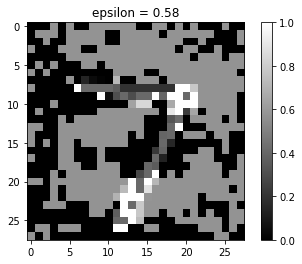

0.361
Epsilon: 0.59	Test Accuracy = 3609 / 10000 = 36.090000%


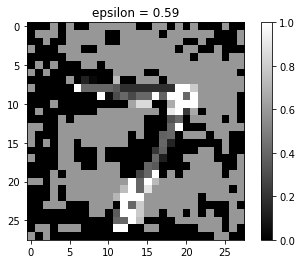

0.3609
Epsilon: 0.6	Test Accuracy = 3609 / 10000 = 36.090000%


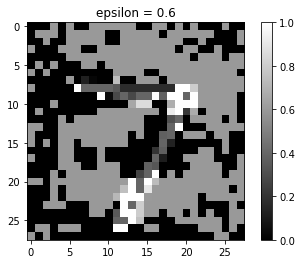

0.3609
Epsilon: 0.61	Test Accuracy = 3609 / 10000 = 36.090000%


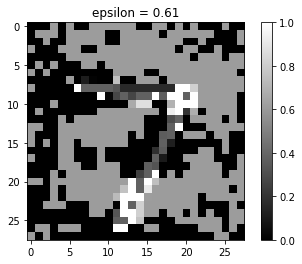

0.3609
Epsilon: 0.62	Test Accuracy = 3609 / 10000 = 36.090000%


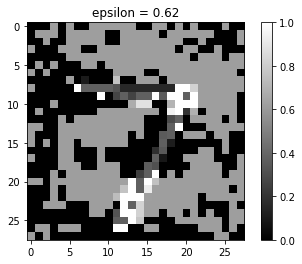

0.3609
Epsilon: 0.63	Test Accuracy = 3608 / 10000 = 36.080000%


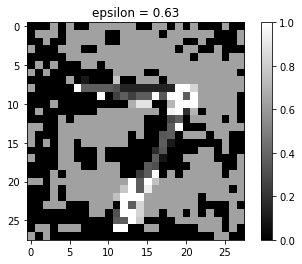

0.3608
Epsilon: 0.64	Test Accuracy = 3608 / 10000 = 36.080000%


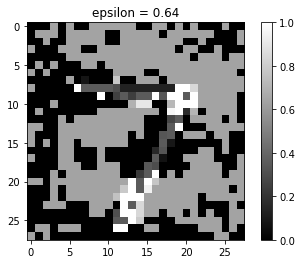

0.3608
Epsilon: 0.65	Test Accuracy = 3609 / 10000 = 36.090000%


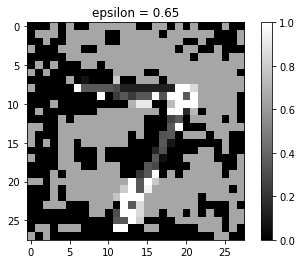

0.3609
Epsilon: 0.66	Test Accuracy = 3609 / 10000 = 36.090000%


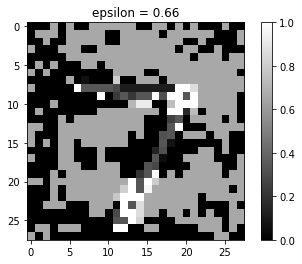

0.3609
Epsilon: 0.67	Test Accuracy = 3609 / 10000 = 36.090000%


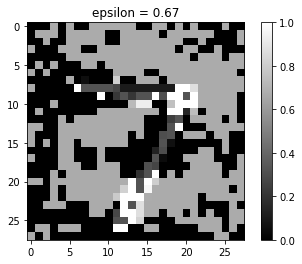

0.3609
Epsilon: 0.68	Test Accuracy = 3608 / 10000 = 36.080000%


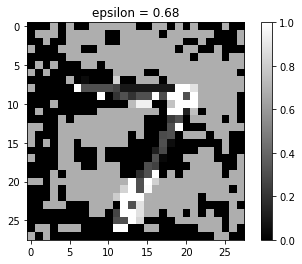

0.3608
Epsilon: 0.6900000000000001	Test Accuracy = 3608 / 10000 = 36.080000%


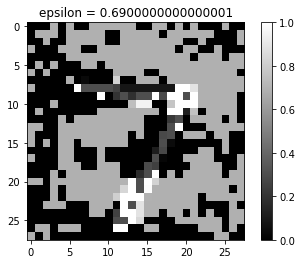

0.3608
Epsilon: 0.7000000000000001	Test Accuracy = 3607 / 10000 = 36.070000%


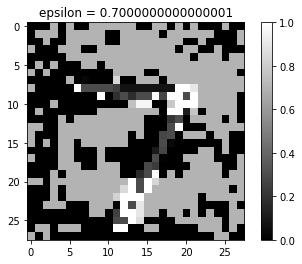

0.3607
Epsilon: 0.71	Test Accuracy = 3608 / 10000 = 36.080000%


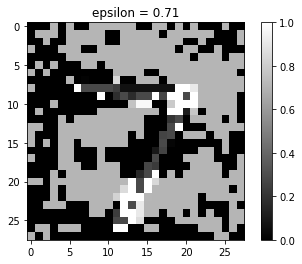

0.3608
Epsilon: 0.72	Test Accuracy = 3608 / 10000 = 36.080000%


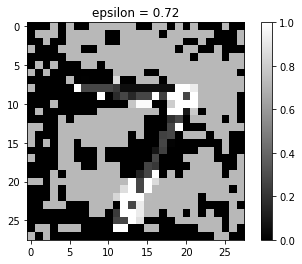

0.3608
Epsilon: 0.73	Test Accuracy = 3607 / 10000 = 36.070000%


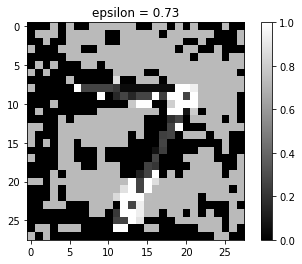

0.3607
Epsilon: 0.74	Test Accuracy = 3607 / 10000 = 36.070000%


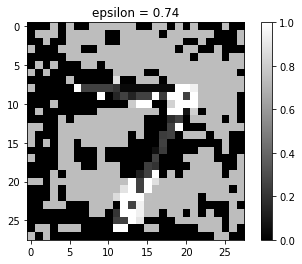

0.3607
Epsilon: 0.75	Test Accuracy = 3606 / 10000 = 36.060000%


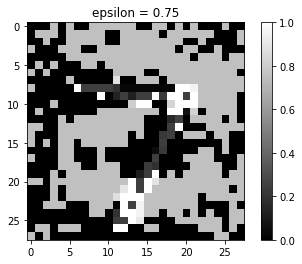

0.3606
Epsilon: 0.76	Test Accuracy = 3605 / 10000 = 36.050000%


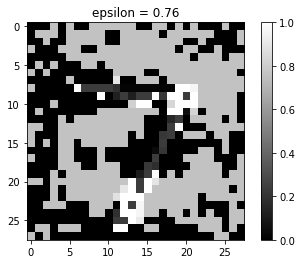

0.3605
Epsilon: 0.77	Test Accuracy = 3605 / 10000 = 36.050000%


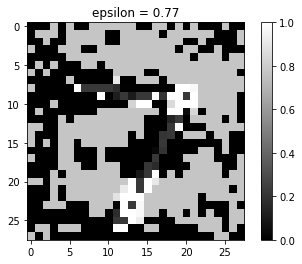

0.3605
Epsilon: 0.78	Test Accuracy = 3605 / 10000 = 36.050000%


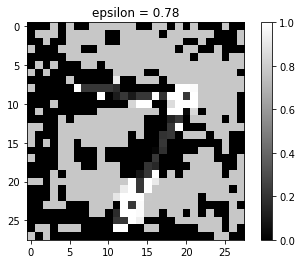

0.3605
Epsilon: 0.79	Test Accuracy = 3606 / 10000 = 36.060000%


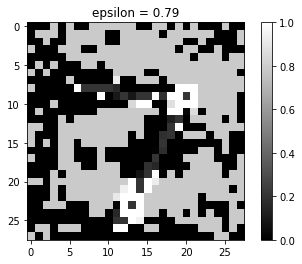

0.3606
Epsilon: 0.8	Test Accuracy = 3606 / 10000 = 36.060000%


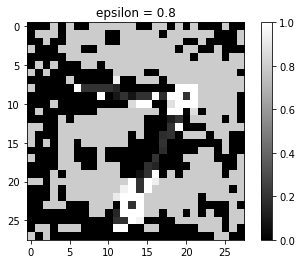

0.3606
Epsilon: 0.81	Test Accuracy = 3606 / 10000 = 36.060000%


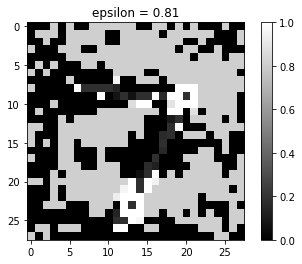

0.3606
Epsilon: 0.8200000000000001	Test Accuracy = 3606 / 10000 = 36.060000%


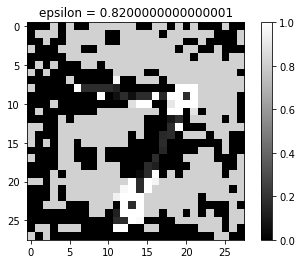

0.3606
Epsilon: 0.8300000000000001	Test Accuracy = 3606 / 10000 = 36.060000%


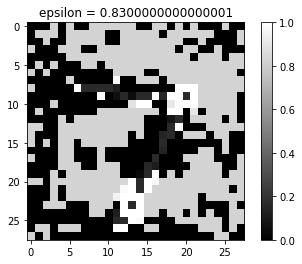

0.3606
Epsilon: 0.84	Test Accuracy = 3606 / 10000 = 36.060000%


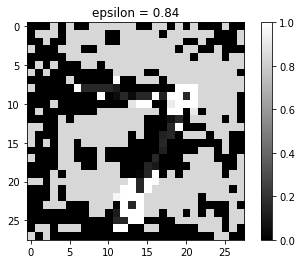

0.3606
Epsilon: 0.85	Test Accuracy = 3606 / 10000 = 36.060000%


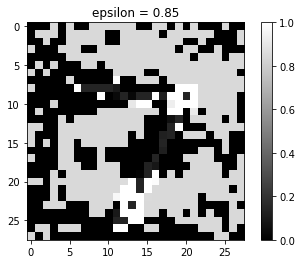

0.3606
Epsilon: 0.86	Test Accuracy = 3606 / 10000 = 36.060000%


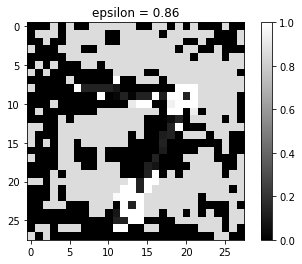

0.3606
Epsilon: 0.87	Test Accuracy = 3605 / 10000 = 36.050000%


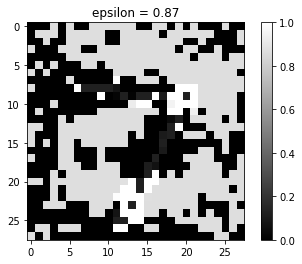

0.3605
Epsilon: 0.88	Test Accuracy = 3605 / 10000 = 36.050000%


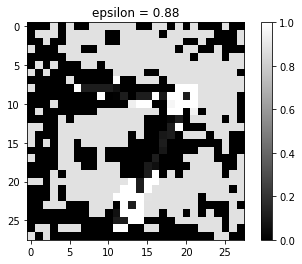

0.3605
Epsilon: 0.89	Test Accuracy = 3604 / 10000 = 36.040000%


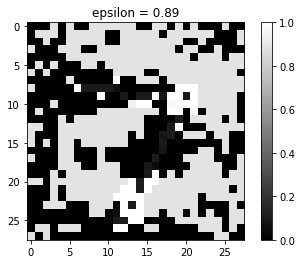

0.3604
Epsilon: 0.9	Test Accuracy = 3604 / 10000 = 36.040000%


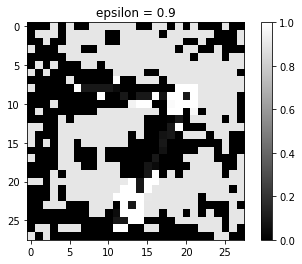

0.3604
Epsilon: 0.91	Test Accuracy = 3604 / 10000 = 36.040000%


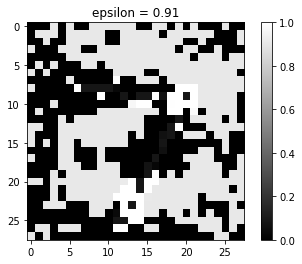

0.3604
Epsilon: 0.92	Test Accuracy = 3603 / 10000 = 36.030000%


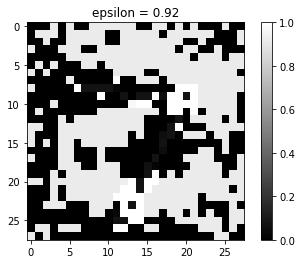

0.3603
Epsilon: 0.93	Test Accuracy = 3602 / 10000 = 36.020000%


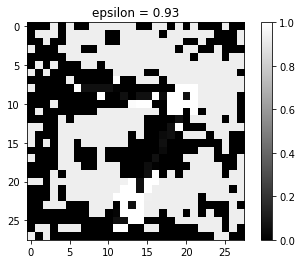

0.3602
Epsilon: 0.9400000000000001	Test Accuracy = 3602 / 10000 = 36.020000%


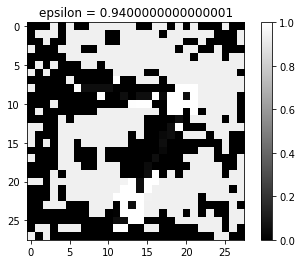

0.3602
Epsilon: 0.9500000000000001	Test Accuracy = 3602 / 10000 = 36.020000%


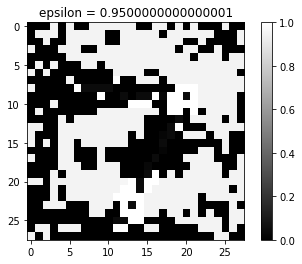

0.3602
Epsilon: 0.96	Test Accuracy = 3602 / 10000 = 36.020000%


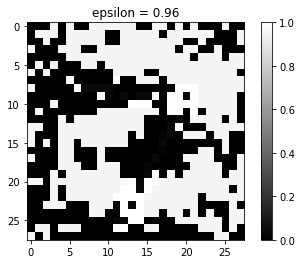

0.3602
Epsilon: 0.97	Test Accuracy = 3602 / 10000 = 36.020000%


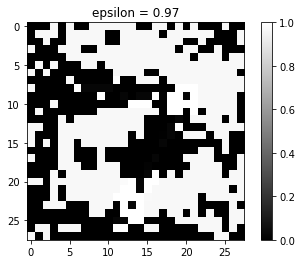

0.3602
Epsilon: 0.98	Test Accuracy = 3602 / 10000 = 36.020000%


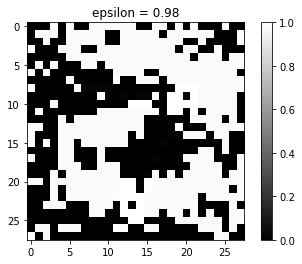

0.3602
Epsilon: 0.99	Test Accuracy = 3602 / 10000 = 36.020000%


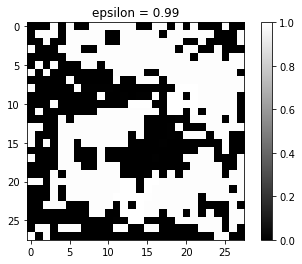

0.3602


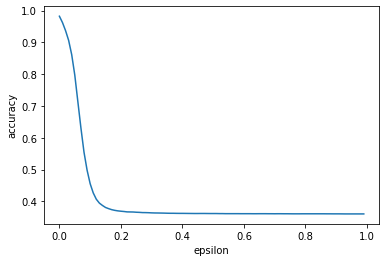

In [12]:
Final_Acc = []
Epsilon = []
for i in range(100):

    softmax = nn.Softmax(dim=1)
    acc = 0
    #sample=(testData.data/255).float()
    #labels=testData.targets
    #packedSample=[sample,labels]
    #Ad_data =  get_fgsm_samples_data(mlp, "cuda", packedSample, i*0.01)
    #plt.figure()
    #plt.imshow(sample[3].cpu().detach().numpy())
    #plt.imshow(Ad_data[3].cpu().detach().numpy())
    #output = mlp(Ad_data).to("cuda")
    #predict = torch.argmax(softmax(output), dim=1)
    #print(predict)
    #acc += (predict == labels.to("cuda")).sum().item()
    #print(acc/len(testdataLoader.dataset))
    #Final_Acc.append(acc/len(testdataLoader.dataset))
    #Epsilon.append(i*0.001)
    
#plt.figure()
#plt.plot(Epsilon, Final_Acc)
#plt.xlabel('epsilon')
#plt.ylabel('accuracy')
#plt.show()    

    final_acc, adv_examples = fgsm.test(mlp,"cpu",testdataLoader, i*0.01)
    plt.figure()
    plt.imshow(adv_examples[0][0].cpu().detach().numpy(),cmap="gray")
    plt.colorbar()
    plt.title('epsilon = {}'.format(i*0.01))
    plt.show()
    output = mlp(adv_examples).to("cuda")
    predict = torch.argmax(softmax(output), dim=1)
    #print(predict)
    labels=testData.targets
    acc += (predict == labels.to("cuda")).sum().item()/len(testdataLoader.dataset)
    print(acc)
    Final_Acc.append(acc)
    Epsilon.append(i*0.01)
   

plt.figure()
plt.plot(Epsilon, Final_Acc)
plt.xlabel('epsilon')
plt.ylabel('accuracy')
plt.show()        
    

In [13]:
#len(testdataLoader.dataset)

In [14]:
#(testData.data)[0]#.cpu().detach().numpy()

In [15]:
#predict

In [16]:
#Ad_data[0].size()
#plt.figure()
#plt.imshow(Ad_data[0].cpu().detach().numpy())

# 确定攻击强度 ε为0.25

In [17]:
#attack_epsilon = 0.25

In [18]:
#traindataLoader=torch.utils.data.DataLoader(trainData,batch_size=len(trainData),shuffle=False)

In [19]:
#train_final_acc, train_adv_data = fgsm.test(mlp,"cuda",traindataLoader, attack_epsilon)
#test_final_acc, test_adv_data = fgsm.test(mlp,"cuda",testdataLoader, attack_epsilon)

In [20]:
#test_final_acc, test_adv_data = fgsm.test(mlp,"cuda",testdataLoader, attack_epsilon)

#plt.figure()
#plt.imshow(adv_examples[0][0].cpu().detach().numpy())

In [21]:
#adv_examples.size()

In [22]:
#Final_Acc = []
#Epsilon = []
#for i in range(20):
#    final_acc, adv_examples = fgsm.test(mlp,"cuda",testdataLoader, i*0.01)
#    Final_Acc.append(final_acc)
#    Epsilon.append(i*0.01)
#plt.figure()
#plt.plot(Epsilon, Final_Acc)
#plt.xlabel('epsilon')
#plt.ylabel('accuracy')
#plt.show()

In [23]:
#index=[0,1,2,3,4,5,6,7]
#fig,ax=plt.subplots(2,len(index),figsize=(2*len(index),2*2))
#adSample=train_adv_data[index]
#orignSample=(trainData.data[index])
#originLabel=trainData.targets[index]
#adLabel=torch.argmax(mlp(adSample.cuda()),dim=1).cpu().detach().numpy()
#for i in range(len(index)):
#    ax[0][i].imshow(orignSample[i])
#    ax[1][i].imshow(adv_examples[i].cpu().detach().numpy().squeeze())
#    ax[0][i].axis("off")
#    ax[1][i].axis("off")
#    ax[0][i].set_title(str(originLabel[i].item())+"->"+str(adLabel[i]))
#fig.show()

In [24]:
#SaveAdversarialData(mlp,trainData,filenames['TrainAdversarialPath'])
#SaveAdversarialData(mlp,testData,filenames['TestAdversarialPath'])

In [25]:
#a0 = get_fgsm_samples_data(mlp, "cuda", packedSample, 0.25)[0]

#plt.figure()
#plt.imshow(a0.cpu().detach().numpy())

In [26]:
#trainLoader.data[0]

In [27]:
a = torch.tensor(1e-45)

In [28]:
torch.sign(a)

tensor(1.)